<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(finding best alpha:smoothing parameter)</strong>
        <ul>
    <li>Considering alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Finding the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning used k-fold cross validation( GridsearchCV or RandomsearchCV)</li>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [ ]:
import pandas
data = pandas.read_csv('/content/sample_data/preprocessed_data.csv',nrows=50000)
data.head(3)
data.value_counts("project_is_approved")

project_is_approved
1    41993
0     8007
dtype: int64

Above if we observe before dividing this data to train and test we have 41993 data points that belong to class 1(project approved) and only 8007 data points that belong to class 0(project not approved)

In [ ]:
y = data['project_is_approved']
X = data.drop(['project_is_approved'], axis=1)
X.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.10, stratify=y_train)
print("y_train: ")
print(y_train.value_counts())
print("y_test: ")
print(y_test.value_counts())



y_train: 
1    28128
0     5372
Name: project_is_approved, dtype: int64
y_test: 
1    13865
0     2635
Name: project_is_approved, dtype: int64


In the above if we observe both training and test data has fewer class 0 points, it may happen sometimes in
multiclass classification if a particualr class has 
very fewer data points like 10, we may missout having 
even one data point of that class in our test set. So stratify helps to over come this problems. Basically startify tries to split in such a way that preserves the same proportions of examples in each class as observed in the original dataset.

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# train test split with startify
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
print("y_train: ")
print(y_train.value_counts())
print("y_test: ")
print(y_test.value_counts())

y_train: 
1    18850
0     3595
Name: project_is_approved, dtype: int64
y_test: 
1    13858
0     2642
Name: project_is_approved, dtype: int64


Here we have used startify and we can see the increased/decreaded number of data points in both train and test set of our minority class 0.

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

#This is for set1 where BOW is used to convert essays to vector form
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations(BOW)")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#This is for set2 where tfidf is used to convert essays to vector form
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer1.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer1.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer1.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer1.transform(X_test['essay'].values)
print("After vectorizations(TFIDF)")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
a=vectorizer.get_feature_names()
features_list=(a)
print(len(a))
print(features_list)
print(len(features_list))

(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
After vectorizations(BOW)
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)
['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '14', '15', '16', '17', '18', '1st', '1st grade', '1st graders', '20', '2016', '2016 2017', '2017', '21', '21st', '21st century', '21st century learners', '21st century skills', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 minutes', '30 students', '3d', '3rd', '3rd grade', '3rd graders', '40', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 minutes day', '60 students', '6th', '6th grade', '6th graders', '70', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 student

In [ ]:
feature_indices={}
b=[]
for i in range(0,5000):
   b.append(i)
feature_indices["essay"]=b
print(feature_indices)

{'essay': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
#encoding categorical feature school state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
a=vectorizer.get_feature_names()
print(len(a))
print("="*100)
a=vectorizer.get_feature_names()
features_list.extend(a)
print(len(a))
print(features_list)
print(len(features_list))


After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
51
51
['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '14', '15', '16', '17', '18', '1st', '1st grade', '1st graders', '20', '2016', '2016 2017', '2017', '21', '21st', '21st century', '21st century learners', '21st century skills', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 minutes', '30 students', '3d', '3rd', '3rd grade', '3rd graders', '40', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 minutes day', '60 students', '6th', '6th grade', '6th graders', '70', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95', '98', '9th', 'abilities', 'ability', 'ability learn', '

In [ ]:
b=[]
for i in range(5000,5051):
   b.append(i)
feature_indices["school state"]=b
print(feature_indices)

{'essay': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
#encoding categorical feature teacher prefix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
a=vectorizer.get_feature_names()
features_list.extend(a)
print(len(a))
print(features_list)
print(len(features_list))

After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
5
['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '14', '15', '16', '17', '18', '1st', '1st grade', '1st graders', '20', '2016', '2016 2017', '2017', '21', '21st', '21st century', '21st century learners', '21st century skills', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 minutes', '30 students', '3d', '3rd', '3rd grade', '3rd graders', '40', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 minutes day', '60 students', '6th', '6th grade', '6th graders', '70', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95', '98', '9th', 'abilities',

In [ ]:
b=[]
for i in range(5051,5056):
   b.append(i)
feature_indices["teacher prefix"]=b
print(feature_indices)

{'essay': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
#encoding categorial feature project_grade_category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
a=vectorizer.get_feature_names()
features_list.extend(a)
print(len(a))
print(features_list)
print(len(features_list))

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
4
['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '14', '15', '16', '17', '18', '1st', '1st grade', '1st graders', '20', '2016', '2016 2017', '2017', '21', '21st', '21st century', '21st century learners', '21st century skills', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 minutes', '30 students', '3d', '3rd', '3rd grade', '3rd graders', '40', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 minutes day', '60 students', '6th', '6th grade', '6th graders', '70', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95', '

In [ ]:
b=[]
for i in range(5056,5060):
   b.append(i)
feature_indices["project_grade_category"]=b
print(feature_indices)

{'essay': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
#encoding categorial feature clean_categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

X_train_clean_category_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_category_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_category_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_category_ohe.shape, y_train.shape)
print(X_cv_clean_category_ohe .shape, y_cv.shape)
print(X_test_clean_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
a=vectorizer.get_feature_names()
features_list.extend(a)
print(len(a))
print(features_list)
print(len(features_list))

After vectorizations
(22445, 7) (22445,)
(11055, 7) (11055,)
(16500, 7) (16500,)
['appliedlearning', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds']
7
['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '14', '15', '16', '17', '18', '1st', '1st grade', '1st graders', '20', '2016', '2016 2017', '2017', '21', '21st', '21st century', '21st century learners', '21st century skills', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 minutes', '30 students', '3d', '3rd', '3rd grade', '3rd graders', '40', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 minutes day', '60 students', '6th', '6th grade', '6th graders', '70', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8

In [ ]:
b=[]
for i in range(5060,5069):
   b.append(i)
feature_indices["clean_categories"]=b
print(feature_indices)

{'essay': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
#encoding categorial feature clean_sub_categories
vectorizer = CountVectorizer(ngram_range=(1,4))
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_clean_subcategory_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategory_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategory_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
print("After vectorizations")
print(X_train_clean_subcategory_ohe.shape, y_train.shape)
print(X_cv_clean_subcategory_ohe .shape, y_cv.shape)
print(X_test_clean_subcategory_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
a=vectorizer.get_feature_names()
features_list.extend(a)
print(len(a))
print(features_list)
print(len(features_list))


After vectorizations
(22445, 326) (22445,)
(11055, 326) (11055,)
(16500, 326) (16500,)
['appliedsciences', 'appliedsciences charactereducation', 'appliedsciences civics_government', 'appliedsciences college_careerprep', 'appliedsciences communityservice', 'appliedsciences earlydevelopment', 'appliedsciences economics', 'appliedsciences environmentalscience', 'appliedsciences esl', 'appliedsciences extracurricular', 'appliedsciences gym_fitness', 'appliedsciences health_lifescience', 'appliedsciences health_wellness', 'appliedsciences history_geography', 'appliedsciences literacy', 'appliedsciences literature_writing', 'appliedsciences mathematics', 'appliedsciences music', 'appliedsciences nutritioneducation', 'appliedsciences other', 'appliedsciences parentinvolvement', 'appliedsciences performingarts', 'appliedsciences socialsciences', 'appliedsciences specialneeds', 'appliedsciences teamsports', 'appliedsciences visualarts', 'charactereducation', 'charactereducation civics_governmen

In [ ]:
b=[]
for i in range(5069,5390):
   b.append(i)
feature_indices["clean_subcategories"]=b
print(feature_indices)

{'essay': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
#Normalizing the feature teacher_number_of_previously_posted_projects
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
#print(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_cv_price_norm=X_cv_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)
a=['price']
print(len(a))
features_list.extend(a)
print(features_list)
print(len(features_list))

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)
1
['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '14', '15', '16', '17', '18', '1st', '1st grade', '1st graders', '20', '2016', '2016 2017', '2017', '21', '21st', '21st century', '21st century learners', '21st century skills', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 minutes', '30 students', '3d', '3rd', '3rd grade', '3rd graders', '40', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 minutes day', '60 students', '6th', '6th grade', '6th graders', '70', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95', '98', '9th', 'abilities', 'ability', 'ability learn', 'ability

In [ ]:
b=[]
for i in range(5390,5391):
   b.append(i)
feature_indices["price"]=b
print(feature_indices)

{'essay': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
#Normalizing the feature teacher_number_of_previously_posted_projects
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#print(X_train['price'].values.reshape(1,-1))

X_train_numteacher_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_numteacher_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_numteacher_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_numteacher_norm=X_train_numteacher_norm.reshape(-1,1)
X_cv_numteacher_norm =X_cv_numteacher_norm .reshape(-1,1)
X_test_numteacher_norm=X_test_numteacher_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_numteacher_norm.shape , y_train.shape)
print(X_cv_numteacher_norm.shape, y_cv.shape)
print(X_test_numteacher_norm.shape, y_test.shape)
print("="*100)
a=['teacher_number_of_previously_posted_projects']
print(len(a))
features_list.extend(a)
print(features_list)
print(len(features_list))

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)
1
['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12', '12th', '14', '15', '16', '17', '18', '1st', '1st grade', '1st graders', '20', '2016', '2016 2017', '2017', '21', '21st', '21st century', '21st century learners', '21st century skills', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 minutes', '30 students', '3d', '3rd', '3rd grade', '3rd graders', '40', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '5th', '5th grade', '5th grade students', '5th graders', '60', '60 minutes', '60 minutes day', '60 students', '6th', '6th grade', '6th graders', '70', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95', '98', '9th', 'abilities', 'ability', 'ability learn', 'ability

In [ ]:
b=[]
for i in range(5391,5392):
   b.append(i)
feature_indices["teacher_number_of_previously_posted_projects"]=b
print(feature_indices)

{'essay': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
from scipy.sparse import hstack
#This is for set 2 where essays are converted to vectors by BOW
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_category_ohe,X_train_clean_subcategory_ohe, X_train_price_norm,X_train_numteacher_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategory_ohe, X_cv_price_norm,X_cv_numteacher_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_category_ohe,X_test_clean_subcategory_ohe,X_test_price_norm,X_test_numteacher_norm)).tocsr()

#This is for set 2 where essays are converted to vectors by tfidf
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_category_ohe,X_train_clean_subcategory_ohe, X_train_price_norm,X_train_numteacher_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategory_ohe, X_cv_price_norm,X_cv_numteacher_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_category_ohe,X_test_clean_subcategory_ohe,X_test_price_norm,X_test_numteacher_norm)).tocsr()
      
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)


Final Data matrix
(22445, 5395) (22445,)
(11055, 5395) (11055,)
(16500, 5395) (16500,)


<h2>1.5 Appling NB on different kind of featurization </h2>



In [ ]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 14/14 [00:02<00:00,  6.49it/s]


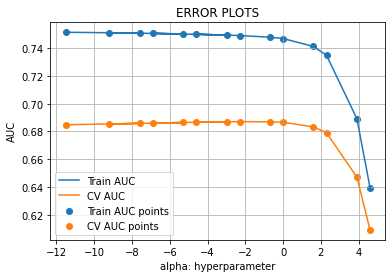

In [ ]:
#Plotting AUC curve and finding best hyperparameter for set1 data(BOW)
#maximum features in countvectorizer is 5000 for this plot, ngram range is [1,4]

import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
from tqdm import tqdm

train_auc = []
cv_auc = []
alpha=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
log_alpha=[]
for i in range(0,len(alpha)):
  a=math.log(alpha[i])
  log_alpha.append(a)
for i in tqdm(alpha):
    clf = MultinomialNB(alpha=i)
    clf.fit(X_tr, y_train)

    y_train_pred = batch_predict(clf, X_tr)    
    y_cv_pred = batch_predict(clf, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Here by looking at the plot we can say alpha approximately equal to 8.1 gives high AUC score of 0.67 and minimal distance from Train AUC curve.

100%|██████████| 14/14 [00:01<00:00, 11.18it/s]


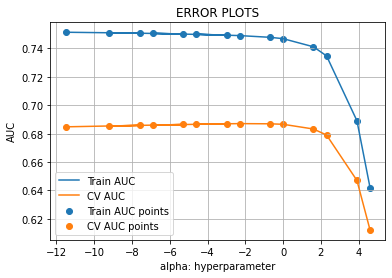

In [ ]:
#Trying with different class prior in Multinomail NB classifier
#maximum features in countvectorizer is 5000 for this plot, ngram range is [1,4]

train_auc = []
cv_auc = []
alpha=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
log_alpha=[]
for i in range(0,len(alpha)):
  a=math.log(alpha[i])
  log_alpha.append(a)
for i in tqdm(alpha):
    clf = MultinomialNB(alpha=i,fit_prior=False, class_prior=[0.5,0.8])
    clf.fit(X_tr, y_train)

    y_train_pred = batch_predict(clf, X_tr)    
    y_cv_pred = batch_predict(clf, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In the above we have changed class prior to [0.5,0.5] and tried plotting AUC curve, we dont see significant change in AUC scores.

100%|██████████| 14/14 [00:01<00:00, 11.53it/s]


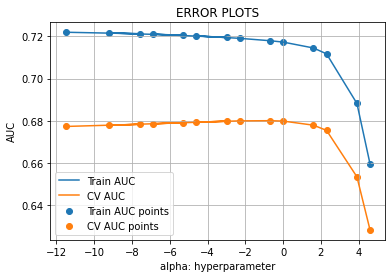

In [ ]:
#Plotting AUC curve and finding best hyperparameter.
#maximum features in countvectorizer for essay is 2000 for this plot, ngram range is [1,4]

import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
from tqdm import tqdm
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
alpha=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
log_alpha=[]
for i in range(0,len(alpha)):
  a=math.log(alpha[i])
  log_alpha.append(a)
for i in tqdm(alpha):
    clf = MultinomialNB(alpha=i)
    clf.fit(X_tr, y_train)

    y_train_pred = batch_predict(clf, X_tr)    
    y_cv_pred = batch_predict(clf, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

The above plot is the plot with essay encoded to vector with maximum feature of 2000 and ngrams from 1 to 4. If not very much, there exists slight decrease in AUC score of CV

100%|██████████| 14/14 [00:01<00:00, 12.19it/s]


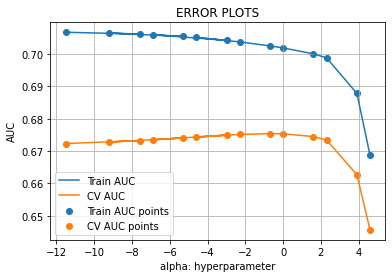

In [ ]:
#Trying with different class prior in Multinomail NB classifier
#maximum features in countvectorizer is 1000 for this plot, ngram range is [1,2]

train_auc = []
cv_auc = []
alpha=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
log_alpha=[]
for i in range(0,len(alpha)):
  a=math.log(alpha[i])
  log_alpha.append(a)
for i in tqdm(alpha):
    clf = MultinomialNB(alpha=i)
    clf.fit(X_tr, y_train)

    y_train_pred = batch_predict(clf, X_tr)    
    y_cv_pred = batch_predict(clf, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Here we get the plot by having essay as vector with max features 1000 and allowing only unigram and bigram features, we are getting significant decrease in AUC score of CV as compared to when we used max features as 5000. If we use solely this plot to select hyperparamter our hyperparamter would still be approximately 8.1 but the model AUC score has decreased with less features hence very less features and ngram range is not suitable for this problem of donors choose dataset.

100%|██████████| 14/14 [00:01<00:00,  7.23it/s]


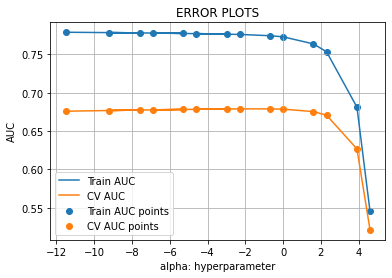

In [ ]:
#Plotting AUC curve and finding best hyperparameter.
#maximum features in countvectorizer is 8000 for this plot, ngram range is [1,5]

import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
from tqdm import tqdm
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
alpha=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
log_alpha=[]
for i in range(0,len(alpha)):
  a=math.log(alpha[i])
  log_alpha.append(a)
for i in tqdm(alpha):
    clf = MultinomialNB(alpha=i)
    clf.fit(X_tr, y_train)

    y_train_pred = batch_predict(clf, X_tr)    
    y_cv_pred = batch_predict(clf, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Here in the above plot the max features to convert essay to vector is 8000 and we can see lesser AUC score when compared to when max features was 5000, this is beacuse as the no.of.features increase need for more data also increases, and if the data available remains constant and if we keep on increasing the no.of.features then there will be decrease in model performance.
So we need to choose no.of.features such that it doesnt cause overfitting or underfitting problems.

100%|██████████| 14/14 [00:01<00:00,  7.63it/s]


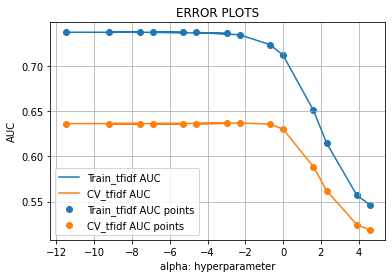

In [ ]:
#Plotting AUC curve and fining best hyperparameter for set2 data(tfidf)
#maximum features in countvectorizer is 5000 for this plot, ngram range is [1,4]

import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
from tqdm import tqdm

train_auc = []
cv_auc = []
alpha=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
log_alpha=[]
for i in range(0,len(alpha)):
  a=math.log(alpha[i])
  log_alpha.append(a)
for i in tqdm(alpha):
    clf = MultinomialNB(alpha=i)
    clf.fit(X_tr_tfidf, y_train)

    y_train_pred = batch_predict(clf, X_tr_tfidf)    
    y_cv_pred = batch_predict(clf, X_cr_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(log_alpha, train_auc, label='Train_tfidf AUC')
plt.plot(log_alpha, cv_auc, label='CV_tfidf AUC')

plt.scatter(log_alpha, train_auc, label='Train_tfidf AUC points')
plt.scatter(log_alpha, cv_auc, label='CV_tfidf AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In this plot we have used set2 with tfidf implementation and if we observe the AUC score we are getting here is less compared to AUC score we got with BOW implementation.
If we have to choose best hyperparameter value from the above plot it will be 0.16

**So finally after testing with various parameters we are going with Set1(BOW) implementation, hyperparamater alpha=8.1, ngram range(1,4) and max features equal to 5000 to train our model.**

**We will also train the model with set2(tfidf) implementation, hyperparameter alpha=0.16, ngram range(1,4) and max features equal to 5000 and see the AUC score on our test data**

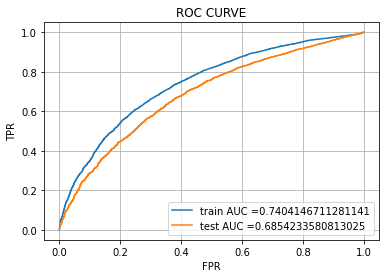

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc

clf = MultinomialNB(alpha=8.1)
clf.fit(X_tr, y_train)

y_train_pred = batch_predict(clf, X_tr)    
y_test_pred = batch_predict(clf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()
plt.show()

In [ ]:
#Finding best threshold and predicting Y_labels
def find_best_threshold(tr_thresholds, train_fpr, train_tpr):
  prev=train_tpr[0]-train_fpr[0]
  for i in range(0,len(tr_thresholds)):
    diff=train_tpr[i]-train_fpr[i]
    if diff>prev:
      best_t=tr_thresholds[i]
      prev=diff
  return best_t
def predict_with_best_t(y_pred, best_t):
  y=[]
  for i in y_pred:
    if i>best_t:
      y.append(1)
    else:
      y.append(0)
  return y


In [ ]:
#Printing confusion matrix
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Best threshold: ",best_t)
print("\nTrain confusion matrix: ")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("\nTest confusion matrix: ")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Best threshold:  0.9250664576471749

Train confusion matrix: 
[[ 2512  1083]
 [ 6344 12506]]

Test confusion matrix: 
[[1656  986]
 [4793 9065]]


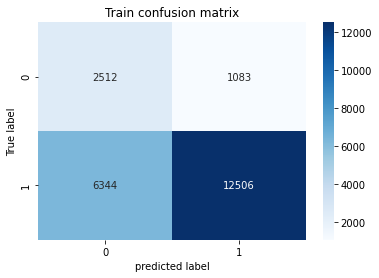

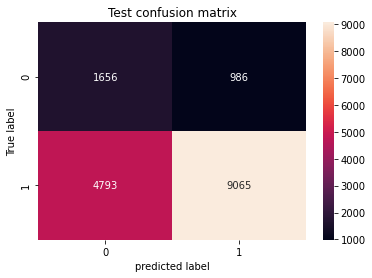

In [ ]:
#Plotting heatmap for confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
data=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(data=data, annot=True,fmt="d",cmap='Blues')
plt.title("Train confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

data1=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(data=data1, annot=True,fmt="d")
plt.title("Test confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

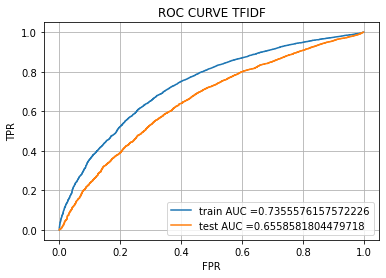

In [ ]:
#Plotting ROC curve for TFIDF dataset with our best alpha value for tfidf i.e, 0.16
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc

clf = MultinomialNB(alpha=0.16)
clf.fit(X_tr_tfidf, y_train)

y_train_pred = batch_predict(clf, X_tr_tfidf)    
y_test_pred = batch_predict(clf, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE TFIDF")
plt.grid()
plt.show()

<h1>3. Summary</h1>



In [ ]:
#Printing Summary in a table
from prettytable import PrettyTable
t=PrettyTable(['Vectorizer','Model','Hyperparameter','AUC'])
t.add_row(['BOW','Naive Bayes','8.1',0.69])
t.add_row(['TFIDF','Naive Bayes','0.16',0.66])
print(t)

+------------+-------------+----------------+------+
| Vectorizer |    Model    | Hyperparameter | AUC  |
+------------+-------------+----------------+------+
|    BOW     | Naive Bayes |      8.1       | 0.69 |
|   TFIDF    | Naive Bayes |      0.16      | 0.66 |
+------------+-------------+----------------+------+
